In [66]:
import numpy as np
import numpy.random as random
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plotter
%matplotlib inline
import itertools as it
import pylab 
import scipy.stats as stats

In [67]:
# 4.(a) Select the training set
# Import data into a Pandas dataframe

data = pd.read_csv("C:\\Users\\KD\\OneDrive\\Machine Learning\\HW1\\prostate_train.csv", index_col=0)
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


           lcavol   lweight       age      lbph       svi       lcp   gleason  \
lcavol   1.000000  0.300232  0.286324  0.063168  0.592949  0.692043  0.426414   
lweight  0.300232  1.000000  0.316723  0.437042  0.181054  0.156829  0.023558   
age      0.286324  0.316723  1.000000  0.287346  0.128902  0.172951  0.365915   
lbph     0.063168  0.437042  0.287346  1.000000 -0.139147 -0.088535  0.032992   
svi      0.592949  0.181054  0.128902 -0.139147  1.000000  0.671240  0.306875   
lcp      0.692043  0.156829  0.172951 -0.088535  0.671240  1.000000  0.476437   
gleason  0.426414  0.023558  0.365915  0.032992  0.306875  0.476437  1.000000   
pgg45    0.483161  0.074166  0.275806 -0.030404  0.481358  0.662533  0.757056   
lpsa     0.733155  0.485215  0.227642  0.262938  0.556886  0.489203  0.342428   

            pgg45      lpsa  
lcavol   0.483161  0.733155  
lweight  0.074166  0.485215  
age      0.275806  0.227642  
lbph    -0.030404  0.262938  
svi      0.481358  0.556886  
lcp      

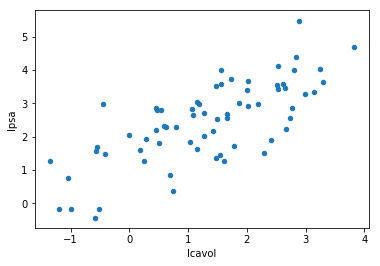

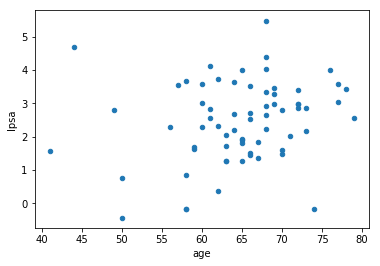

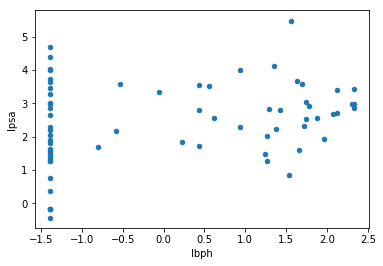

In [68]:
# 4.(b) Data exploration

# One-variable summary statistics
mean = data['lpsa'].mean()
variance = data['lpsa'].var()
minimum = data['lpsa'].min()
maximum = data['lpsa'].max()
firstQuantile = data['lpsa'].quantile(q=0.25)
median = data['lpsa'].median()
secondQuantile = data['lpsa'].quantile(q=0.75)

# print ("min",minimum)
# print ("max",maximum)
# print ("median",median)
# print ("quantiles",quantile)

# Two-variable summary statistics

correlation = data.corr(method="pearson")
co_variance = data.cov()

print (correlation)

# Correlation gives an intuition of how strong two random variables are related. Higher correlation means stronger relationship.
# A correlation of 1 means a perfectly linear relationship. So, correlations closer to 1.0 are better.

# In the Correlations summary below, The correlation between lpsa and lcavol is 0.733155, hence it is a good idea to use lcavol 
# as a predictor in a linear regression to predict lpsa. However, it is a bad idea to use age or lbph since the relationship is
# not as strong which is indicated by the correlation value. These plots are shown below. As you can see lpsa and lcavol increase
# or decrease together, which is not the case with lpsa vs age. This is what is indicated by the correlation values

data.plot(kind="scatter", x='lcavol',y='lpsa')
data.plot(kind="scatter", x='age',y='lpsa')
data.plot(kind="scatter", x='lbph',y='lpsa')



In [69]:
# CATEGORICAL VARIABLES :
# The variable 'svi' is a categorical variable taking a 0 or a 1 as value. From correlation value, its relationship with 'lpsa'
# can be considered as a moderate linear relationship. The value of svi basically shifts the fitted line by the constant term
# because the slope is the same, whether svi = 0 or svi = 1


C:\Users\KD\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: sort(....) is deprecated, use sort_index(.....)


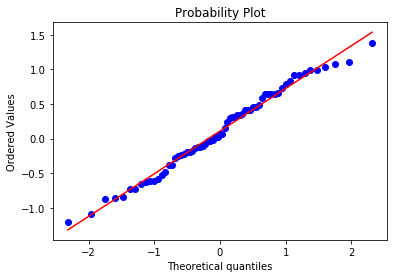

In [70]:
# 4.(c) Assumption of Normality

# Linear regression with all the predictors
predictors = ['lcavol','lweight','age','lbph','svi', 'lcp', 'gleason', 'pgg45']
X = data[predictors]
Y = data.lpsa

linearModel = LinearRegression()
linearModel.fit(X,Y)

# print (linearModel)
# print (linearModel.intercept_)
# print (linearModel.coef_)
# print ("Residues->", linearModel.residues_)

residuals = []

for row in data.itertuples():
    variables = []
    for index in range (1,9):
        variables.append(row[index])
    
    y = linearModel.predict([variables])
    residuals.append(row[9] - y[0])

    
residualData = pd.DataFrame(residuals)

residualData.sort()

norm = random.normal(0,residualData.std(),len(residualData))
norm.sort()

stats.probplot(norm, dist="norm", plot=pylab)
pylab.show()

# From the q-q plot, the distribution is heavily tailed. This means the data has more extremes than what is in a normal 
# distribution.

In [71]:
# 4.(d) All Subsets Variable selection

allLinearModels = []
residues = []
predictors = ['lcavol','lweight','age','lbph','svi', 'lcp', 'gleason', 'pgg45']
for x in range(1,9):
    subsets = list(it.combinations(predictors, x))
    
    for predictor in subsets:
        predictorList = list(predictor)
        x = data[predictorList]
        y = data.lpsa
        
        linearModel.fit(x,y)
        
        residues.append((len(predictorList), linearModel.residues_))
        


C:\Users\KD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\KD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\KD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\KD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\KD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py

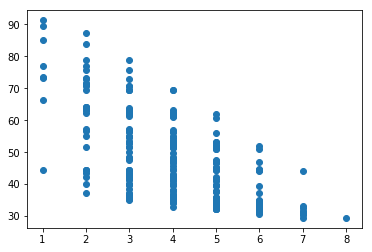

In [72]:
x,y = zip(*residues)
plotter.scatter(x,y)

# The plot below shows RSS vs Number of predictors. All subsets are combined into this plot.
# RSS is least only for all 8 predictors

In [73]:
# 4.(e) Variable selection : Statistical regularization

# RIDGE :
regRidge = linear_model.Ridge(alpha=0)
regRidge.fit(X,Y)

print (regRidge.coef_)
print (regRidge.intercept_)

# LASSO:
regLasso = linear_model.Lasso(alpha=1)
regLasso.fit(X,Y)

print (regLasso.coef_)
print (regLasso.intercept_)

[ 0.57654319  0.61402    -0.01900102  0.14484808  0.73720864 -0.20632423
 -0.02950288  0.00946516]
0.429170132849
[ 0.          0.          0.          0.          0.          0.          0.
  0.01728609]
1.99826269692


In [74]:
# 4.(f) Performance Evaluation

validationData = pd.read_csv("C:\\Users\\KD\\OneDrive\\Machine Learning\\HW1\\prostate_validation.csv", index_col=0)
x = validationData[predictorList]
y = validationData.lpsa

# All subsets
print ("All subsets",linearModel.score(x,y))

# Ridge
print ("regRidge",regRidge.score(x,y))

# Lasso
print ("regLasso",regLasso.score(x,y))

# The Ridge model performs best because it has the best Coefficient of determination (R^2) value. The values are below.


All subsets 0.503379850238
regRidge 0.503379850238
regLasso 0.0979529317621


In [75]:
# 4.(g) Interpretation of the Results

# The best fit seems to be the Ridge model because of the fact that it has the best Coefficient of determination (R^2) value.
# This is because, it chooses parameters (beta) to penalize in such a way that less influential predictors (Some predictors
# cause very small influence on dependent variable) undergo more penalization. Hence this variable selection and regularization
# procedure puts it above the rest.
